# Project: 
### Using past college NCAA basketball player data, predict NBA rookie year performance

In [59]:
#current main dataframes = college_df_regular_season, new_nba_rookie_pointsOnly_df

In [475]:
from __future__ import print_function, division
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

In [2]:
with open("college_df_regular_season.pkl", 'rb') as picklefile: 
    college_df_regular_season = pickle.load(picklefile)
    
with open("nba_rookie_df.pkl", 'rb') as picklefile: 
    nba_rookie_df = pickle.load(picklefile)
    

### Display pickled college basketball player data (scraped from espn.com) - feature set for prediction are the columns below

In [105]:
college_df_regular_season


,Rank,Player,Team,Games Played,Minutes Per Game,Points Per Game,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,Player Position
0,1,Jason Conley,VMI,28,34.3,29.3,10.2-21.8,.467,2.8-8.5,.333,6.1-7.5,.818,F
1,3,Mire Chatman,TRGV,30,34.2,25.3,8.8-18.3,.484,2.2-6.2,.349,5.5-7.9,.699,G
2,5,Melvin Ely,FRES,27,35.4,23.5,8.9-15.8,.563,0.0-0.0,.000,5.7-7.7,.744,C
3,7,Keith McLeod,BGSU,32,33.7,22.9,6.8-15.1,.447,2.7-6.6,.408,6.7-8.2,.814,G
4,9,Chris Davis,UNT,29,33.0,22.6,7.5-15.6,.479,1.6-4.7,.336,6.0-7.9,.760,G
5,11,Kevin Martin,WCU,28,32.6,22.1,7.0-14.5,.484,2.6-6.8,.382,5.5-6.6,.828,G
6,13,Steve Logan,CIN,33,34.0,22.0,7.0-15.3,.456,2.4-6.5,.376,5.6-6.5,.869,G
7,15,David Bailey,L-IL,30,31.2,21.7,7.5-17.3,.432,1.8-6.0,.300,5.0-6.7,.745,G
8,17,Richard Toussaint,COOK,29,33.5,21.6,6.8-14.7,.462,0.1-0.5,.133,7.9-9.9,.795,F
9,19,Leon Rodgers,NIU,28,32.9,21.3,7.0-13.7,.508,1.2-2.6,.446,6.2-7.8,.797,F


### Display NBA rookie data from year 2002 - 2017(scraped from basketball-reference.com)

In [107]:
new_nba_rookie_df = nba_rookie_df.filter(["Player", "FG%", "FT%", "Minutes Played Per Game", "Turnovers", "3 pt Field Goals", "3 pt Attempts", "Points Per Game"], axis = 1)

In [108]:
#########new_nba_rookie_df
#this is most likely the longterm feature set I will use from NBA 

In [109]:
new_nba_rookie_pointsOnly_df = nba_rookie_df.filter(["Player", "Points Per Game"], axis = 1)

In [112]:
college_df_regular_season

,Rank,Player,Team,Games Played,Minutes Per Game,Points Per Game,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,Player Position
0,1,Jason Conley,VMI,28,34.3,29.3,10.2-21.8,.467,2.8-8.5,.333,6.1-7.5,.818,F
1,3,Mire Chatman,TRGV,30,34.2,25.3,8.8-18.3,.484,2.2-6.2,.349,5.5-7.9,.699,G
2,5,Melvin Ely,FRES,27,35.4,23.5,8.9-15.8,.563,0.0-0.0,.000,5.7-7.7,.744,C
3,7,Keith McLeod,BGSU,32,33.7,22.9,6.8-15.1,.447,2.7-6.6,.408,6.7-8.2,.814,G
4,9,Chris Davis,UNT,29,33.0,22.6,7.5-15.6,.479,1.6-4.7,.336,6.0-7.9,.760,G
5,11,Kevin Martin,WCU,28,32.6,22.1,7.0-14.5,.484,2.6-6.8,.382,5.5-6.6,.828,G
6,13,Steve Logan,CIN,33,34.0,22.0,7.0-15.3,.456,2.4-6.5,.376,5.6-6.5,.869,G
7,15,David Bailey,L-IL,30,31.2,21.7,7.5-17.3,.432,1.8-6.0,.300,5.0-6.7,.745,G
8,17,Richard Toussaint,COOK,29,33.5,21.6,6.8-14.7,.462,0.1-0.5,.133,7.9-9.9,.795,F
9,19,Leon Rodgers,NIU,28,32.9,21.3,7.0-13.7,.508,1.2-2.6,.446,6.2-7.8,.797,F


In [113]:
college_df_regular_season["Player"] = college_df_regular_season["Player"].apply(lambda x: x.split(", ")[0])


In [114]:
college_df_regular_season

,Rank,Player,Team,Games Played,Minutes Per Game,Points Per Game,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,Player Position
0,1,Jason Conley,VMI,28,34.3,29.3,10.2-21.8,.467,2.8-8.5,.333,6.1-7.5,.818,F
1,3,Mire Chatman,TRGV,30,34.2,25.3,8.8-18.3,.484,2.2-6.2,.349,5.5-7.9,.699,G
2,5,Melvin Ely,FRES,27,35.4,23.5,8.9-15.8,.563,0.0-0.0,.000,5.7-7.7,.744,C
3,7,Keith McLeod,BGSU,32,33.7,22.9,6.8-15.1,.447,2.7-6.6,.408,6.7-8.2,.814,G
4,9,Chris Davis,UNT,29,33.0,22.6,7.5-15.6,.479,1.6-4.7,.336,6.0-7.9,.760,G
5,11,Kevin Martin,WCU,28,32.6,22.1,7.0-14.5,.484,2.6-6.8,.382,5.5-6.6,.828,G
6,13,Steve Logan,CIN,33,34.0,22.0,7.0-15.3,.456,2.4-6.5,.376,5.6-6.5,.869,G
7,15,David Bailey,L-IL,30,31.2,21.7,7.5-17.3,.432,1.8-6.0,.300,5.0-6.7,.745,G
8,17,Richard Toussaint,COOK,29,33.5,21.6,6.8-14.7,.462,0.1-0.5,.133,7.9-9.9,.795,F
9,19,Leon Rodgers,NIU,28,32.9,21.3,7.0-13.7,.508,1.2-2.6,.446,6.2-7.8,.797,F


#### Just checking below for the most significant outliar with respect to NBA points

In [115]:
college_df_regular_season[college_df_regular_season["Player"] == "Kevin Durant"]

,Rank,Player,Team,Games Played,Minutes Per Game,Points Per Game,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,Player Position
1051,4,Kevin Durant,TEX,33,35.7,25.6,8.8-18.5,.474,2.4-5.8,.421,5.7-7.0,.810,G-F


In [116]:
college_df_regular_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 13 columns):
Rank                1620 non-null object
Player              1620 non-null object
Team                1620 non-null object
Games Played        1620 non-null object
Minutes Per Game    1620 non-null object
Points Per Game     1620 non-null object
FGM-FGA             1620 non-null object
FG%                 1620 non-null object
3PM-3PA             1620 non-null object
3P%                 1620 non-null object
FTM-FTA             1620 non-null object
FT%                 1620 non-null object
Player Position     1620 non-null object
dtypes: object(13)
memory usage: 164.6+ KB


In [117]:
new_nba_rookie_pointsOnly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 0 to 30290
Data columns (total 2 columns):
Player             1162 non-null object
Points Per Game    1162 non-null object
dtypes: object(2)
memory usage: 27.2+ KB


# Merge College Player & NBA Rookie data sets

In [388]:
merged_df = pd.merge(college_df_regular_season, new_nba_rookie_pointsOnly_df, on="Player")
merged_df_outer = pd.merge(college_df_regular_season, new_nba_rookie_pointsOnly_df, on="Player", how="outer")

In [389]:
merged_df_outer['Points Per Game_y'].fillna(value=0, inplace=True)

In [390]:
merged_df = merged_df_outer.dropna() #Drop all the N/A values 

In [392]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 14 columns):
Rank                 1620 non-null object
Player               1620 non-null object
Team                 1620 non-null object
Games Played         1620 non-null object
Minutes Per Game     1620 non-null object
Points Per Game_x    1620 non-null object
FGM-FGA              1620 non-null object
FG%                  1620 non-null object
3PM-3PA              1620 non-null object
3P%                  1620 non-null object
FTM-FTA              1620 non-null object
FT%                  1620 non-null object
Player Position      1620 non-null object
Points Per Game_y    1620 non-null object
dtypes: object(14)
memory usage: 189.8+ KB


In [393]:
# Convert all numerical strings to floats
merged_df[['Minutes Per Game','Points Per Game_x', 'FG%', '3P%', 'FT%', 'Points Per Game_y']] = merged_df[['Minutes Per Game','Points Per Game_x', 'FG%', '3P%', 'FT%', 'Points Per Game_y']].apply(pd.to_numeric)



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [394]:
merged_df


,Rank,Player,Team,Games Played,Minutes Per Game,Points Per Game_x,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%,Player Position,Points Per Game_y
0,1,Jason Conley,VMI,28,34.3,29.3,10.2-21.8,0.467,2.8-8.5,0.333,6.1-7.5,0.818,F,0.0
1,3,Mire Chatman,TRGV,30,34.2,25.3,8.8-18.3,0.484,2.2-6.2,0.349,5.5-7.9,0.699,G,0.0
2,5,Melvin Ely,FRES,27,35.4,23.5,8.9-15.8,0.563,0.0-0.0,0.000,5.7-7.7,0.744,C,5.3
3,7,Keith McLeod,BGSU,32,33.7,22.9,6.8-15.1,0.447,2.7-6.6,0.408,6.7-8.2,0.814,G,5.5
4,9,Chris Davis,UNT,29,33.0,22.6,7.5-15.6,0.479,1.6-4.7,0.336,6.0-7.9,0.760,G,0.0
5,11,Kevin Martin,WCU,28,32.6,22.1,7.0-14.5,0.484,2.6-6.8,0.382,5.5-6.6,0.828,G,17.4
6,2,Kevin Martin,WCU,27,31.2,24.9,7.7-16.3,0.474,1.9-5.6,0.336,7.6-9.3,0.817,G,17.4
7,13,Steve Logan,CIN,33,34.0,22.0,7.0-15.3,0.456,2.4-6.5,0.376,5.6-6.5,0.869,G,0.0
8,15,David Bailey,L-IL,30,31.2,21.7,7.5-17.3,0.432,1.8-6.0,0.300,5.0-6.7,0.745,G,0.0
9,17,Richard Toussaint,COOK,29,33.5,21.6,6.8-14.7,0.462,0.1-0.5,0.133,7.9-9.9,0.795,F,0.0


In [449]:
merged_df.columns
#merged_df = pd.merge(merged_df, groupby_df, on="Player")

Index(['Player', 'Team', 'Games Played', 'Minutes Per Game',
       'Points Per Game_x', 'FG%', '3P%', 'FT%', 'Player Position',
       'Points Per Game_y', 'Num col seasons played'],
      dtype='object')

In [450]:
#merged_df.drop(["Num of Seasons Played", "0_x"], axis=1)
merged_df.rename(columns={                   0:'Num coll seasons played'}, inplace=True)

In [509]:
len(merged_df["Team"].unique())

337

# MOST STABLE MERGED_DF below

In [451]:
stable_merged_df = merged_df

In [576]:
stable_merged_df[stable_merged_df["Player"] == ]

,Player,Team,Games Played,Minutes Per Game,Points Per Game_x,FG%,3P%,FT%,Player Position,Points Per Game_y,Num col seasons played
1231,Kevin Durant,TEX,33,35.7,25.6,0.474,0.421,0.81,G-F,27.1,1


In [518]:
stable_merged_df

,Player,Team,Games Played,Minutes Per Game,Points Per Game_x,FG%,3P%,FT%,Player Position,Points Per Game_y,Num col seasons played
0,Jason Conley,VMI,28,34.3,29.3,0.467,0.333,0.818,F,0.0,1
1,Mire Chatman,TRGV,30,34.2,25.3,0.484,0.349,0.699,G,0.0,1
2,Melvin Ely,FRES,27,35.4,23.5,0.563,0.000,0.744,C,5.3,1
3,Keith McLeod,BGSU,32,33.7,22.9,0.447,0.408,0.814,G,5.5,1
4,Chris Davis,UNT,29,33.0,22.6,0.479,0.336,0.760,G,0.0,1
5,Kevin Martin,WCU,28,32.6,22.1,0.484,0.382,0.828,G,17.4,2
6,Kevin Martin,WCU,27,31.2,24.9,0.474,0.336,0.817,G,17.4,2
7,Steve Logan,CIN,33,34.0,22.0,0.456,0.376,0.869,G,0.0,1
8,David Bailey,L-IL,30,31.2,21.7,0.432,0.300,0.745,G,0.0,1
9,Richard Toussaint,COOK,29,33.5,21.6,0.462,0.133,0.795,F,0.0,1


#### Checking below to see the number of values that are lower than the mean of NBA points per game 

In [561]:
stable_merged_df.loc[(stable_merged_df['Points Per Game_y'] < 5) & (stable_merged_df['Points Per Game_y'] > 0)]

,Player,Team,Games Played,Minutes Per Game,Points Per Game_x,FG%,3P%,FT%,Player Position,Points Per Game_y,Num col seasons played
12,Reece Gaines,LOU,30,32.8,21.1,0.457,0.375,0.798,G,1.7,1
29,Ryan Humphrey,ND,29,35.4,19.0,0.503,0.500,0.578,F,2.3,1
34,Tamar Slay,MRSH,30,34.4,18.9,0.446,0.419,0.731,G,2.6,1
56,Quinton Ross,SMU,29,34.6,17.4,0.420,0.319,0.769,G,4.1,1
57,Brandon Hunter,OHIO,26,32.4,17.3,0.489,0.373,0.603,F,3.3,1
62,Randy Holcomb,SDSU,32,32.4,17.2,0.519,0.308,0.636,F,0.5,1
69,Luis Flores,MAN,29,36.1,24.1,0.446,0.373,0.869,G,2.2,2
70,Luis Flores,MAN,28,36.3,18.9,0.447,0.396,0.870,G,2.2,2
76,Luke Jackson,ORE,27,34.5,21.1,0.480,0.443,0.870,F,3.5,1
77,Andre Emmett,TTU,32,36.8,20.7,0.523,0.341,0.734,G,1.4,2


In [520]:
stable_merged_df.columns

Index(['Player', 'Team', 'Games Played', 'Minutes Per Game',
       'Points Per Game_x', 'FG%', '3P%', 'FT%', 'Player Position',
       'Points Per Game_y', 'Num col seasons played'],
      dtype='object')

In [525]:
names_and_team_df = stable_merged_df[["Player", "Team"]]

In [527]:
names_and_team_df.drop_duplicates(subset="Player", keep='first')

,Player,Team
0,Jason Conley,VMI
1,Mire Chatman,TRGV
2,Melvin Ely,FRES
3,Keith McLeod,BGSU
4,Chris Davis,UNT
5,Kevin Martin,WCU
7,Steve Logan,CIN
8,David Bailey,L-IL
9,Richard Toussaint,COOK
10,Leon Rodgers,NIU


In [513]:
stable_merged_df['Num col seasons played'].value_counts(0)

1    910
2    502
3    183
4     20
5      5
Name: Num col seasons played, dtype: int64

#### Averaging all of the numerican values so that duplicate players names are eliminated. NBA ppg value stays the same as the PPG/game is the same every time for a particular player

In [562]:
final_cleaned_df = stable_merged_df.groupby(['Player', 'Player Position'])['Games Played', 'Minutes Per Game', 'Points Per Game_x', 'FG%', '3P%', 'FT%', 'Player Position', 'Points Per Game_y', 'Num col seasons played'].mean().reset_index()

In [563]:
final_cleaned_df.loc[final_cleaned_df['Num col seasons played'] == 5]

,Player,Player Position,Games Played,Minutes Per Game,Points Per Game_x,FG%,3P%,FT%,Points Per Game_y,Num col seasons played
815,Marcus Thornton,G,31.6,34.76,19.54,0.448,0.3998,0.798,11.9,5.0


In [564]:
final_cleaned_df['Player Position'].nunique()

5

#### Adding dummy variables 1s or 0s to the players based on their positions. Ex: If player is center, 1 will be assigned under "center" column, and 0s across other features

In [565]:
dummy = pd.get_dummies(final_cleaned_df['Player Position'])

In [566]:
final_cleaned_df = pd.concat([final_cleaned_df, dummy], axis = 1)

In [549]:
final_cleaned_df.drop(["Player Position"], axis = 1, inplace=True)

In [567]:
final_cleaned_df = final_cleaned_df[["Games Played", "Minutes Per Game", "Points Per Game_x", "FG%", "3P%", "FT%", "C", "F", "F-C", "G", "G-F", "Num col seasons played","Points Per Game_y"]]
final_cleaned_df.rename(index=str, columns={"Points Per Game_x": "PPG_Coll", "Points Per Game_y": "PPG_NBA"}, inplace=True)

In [568]:
final_cleaned_df

,Games Played,Minutes Per Game,PPG_Coll,FG%,3P%,FT%,C,F,F-C,G,G-F,Num col seasons played,PPG_NBA
0,32.0,36.50,18.80,0.4540,0.3770,0.8170,0,0,0,0,1,1.0,0.0
1,30.0,36.55,21.15,0.4325,0.3840,0.8125,0,0,0,1,0,2.0,0.0
2,32.0,35.30,17.00,0.3760,0.3540,0.9580,0,0,0,1,0,1.0,0.0
3,28.0,35.40,16.90,0.4660,0.3500,0.8500,0,1,0,0,0,1.0,0.0
4,33.0,26.30,17.00,0.5930,0.0000,0.7780,1,0,0,0,0,1.0,0.0
5,34.0,36.50,17.50,0.4160,0.3590,0.8270,0,0,0,1,0,1.0,0.0
6,33.0,32.00,21.20,0.4850,0.3220,0.7350,1,0,0,0,0,1.0,0.0
7,28.0,27.50,17.30,0.4770,0.3980,0.7930,0,1,0,0,0,1.0,0.0
8,31.0,36.80,17.60,0.4580,0.4070,0.8290,0,0,0,1,0,1.0,9.7
9,27.0,29.20,18.20,0.4670,0.3270,0.7180,0,1,0,0,0,1.0,0.0


In [569]:
final_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 0 to 1227
Data columns (total 13 columns):
Games Played              1228 non-null float64
Minutes Per Game          1228 non-null float64
PPG_Coll                  1228 non-null float64
FG%                       1228 non-null float64
3P%                       1228 non-null float64
FT%                       1228 non-null float64
C                         1228 non-null uint8
F                         1228 non-null uint8
F-C                       1228 non-null uint8
G                         1228 non-null uint8
G-F                       1228 non-null uint8
Num col seasons played    1228 non-null float64
PPG_NBA                   1228 non-null float64
dtypes: float64(8), uint8(5)
memory usage: 92.3+ KB


#### All the players that scored a 0.0 ppg in NBA are removed as many of them never played in the NBA

In [580]:
final_cleaned_df

,Games Played,Minutes Per Game,PPG_Coll,FG%,3P%,FT%,C,F,F-C,G,G-F,Num col seasons played,PPG_NBA,Log PPG_NBA
8,31.000000,36.800000,17.600000,0.458000,0.407000,0.829000,0,0,0,1,0,1.0,9.7,2.370244
18,29.500000,35.200000,23.450000,0.496000,0.372500,0.771500,0,1,0,0,0,2.0,7.5,2.140066
25,32.000000,31.600000,20.000000,0.523000,0.446000,0.816000,0,1,0,0,0,1.0,11.9,2.557227
30,27.000000,30.666667,18.533333,0.485667,0.000000,0.729667,1,0,0,0,0,3.0,6.4,2.001480
31,32.000000,32.900000,19.450000,0.466500,0.283000,0.596500,0,1,0,0,0,2.0,4.1,1.629241
32,34.000000,31.300000,20.100000,0.456000,0.282000,0.823000,0,0,0,1,0,1.0,9.7,2.370244
43,29.666667,32.600000,17.766667,0.428333,0.394333,0.833667,0,0,0,1,0,3.0,6.2,1.974081
44,31.000000,36.200000,18.700000,0.462000,0.349000,0.813000,0,0,0,1,0,1.0,9.5,2.351375
48,29.000000,35.900000,17.600000,0.457000,0.392000,0.765000,0,0,0,1,0,1.0,3.3,1.458615
50,31.500000,34.650000,19.850000,0.526500,0.337000,0.705500,0,0,0,1,0,2.0,1.4,0.875469


#### The nba PPG value (target value) is logged as the distribution is heavily right skewed. Never used but useful to have to see the order of magnitude increase in performance of players

In [581]:
final_cleaned_df["Log PPG_NBA"] = final_cleaned_df["PPG_NBA"].apply(lambda x: np.log1p(x))

#### Pairplot is used to assess relationships between different features and the target(NBA PPG)

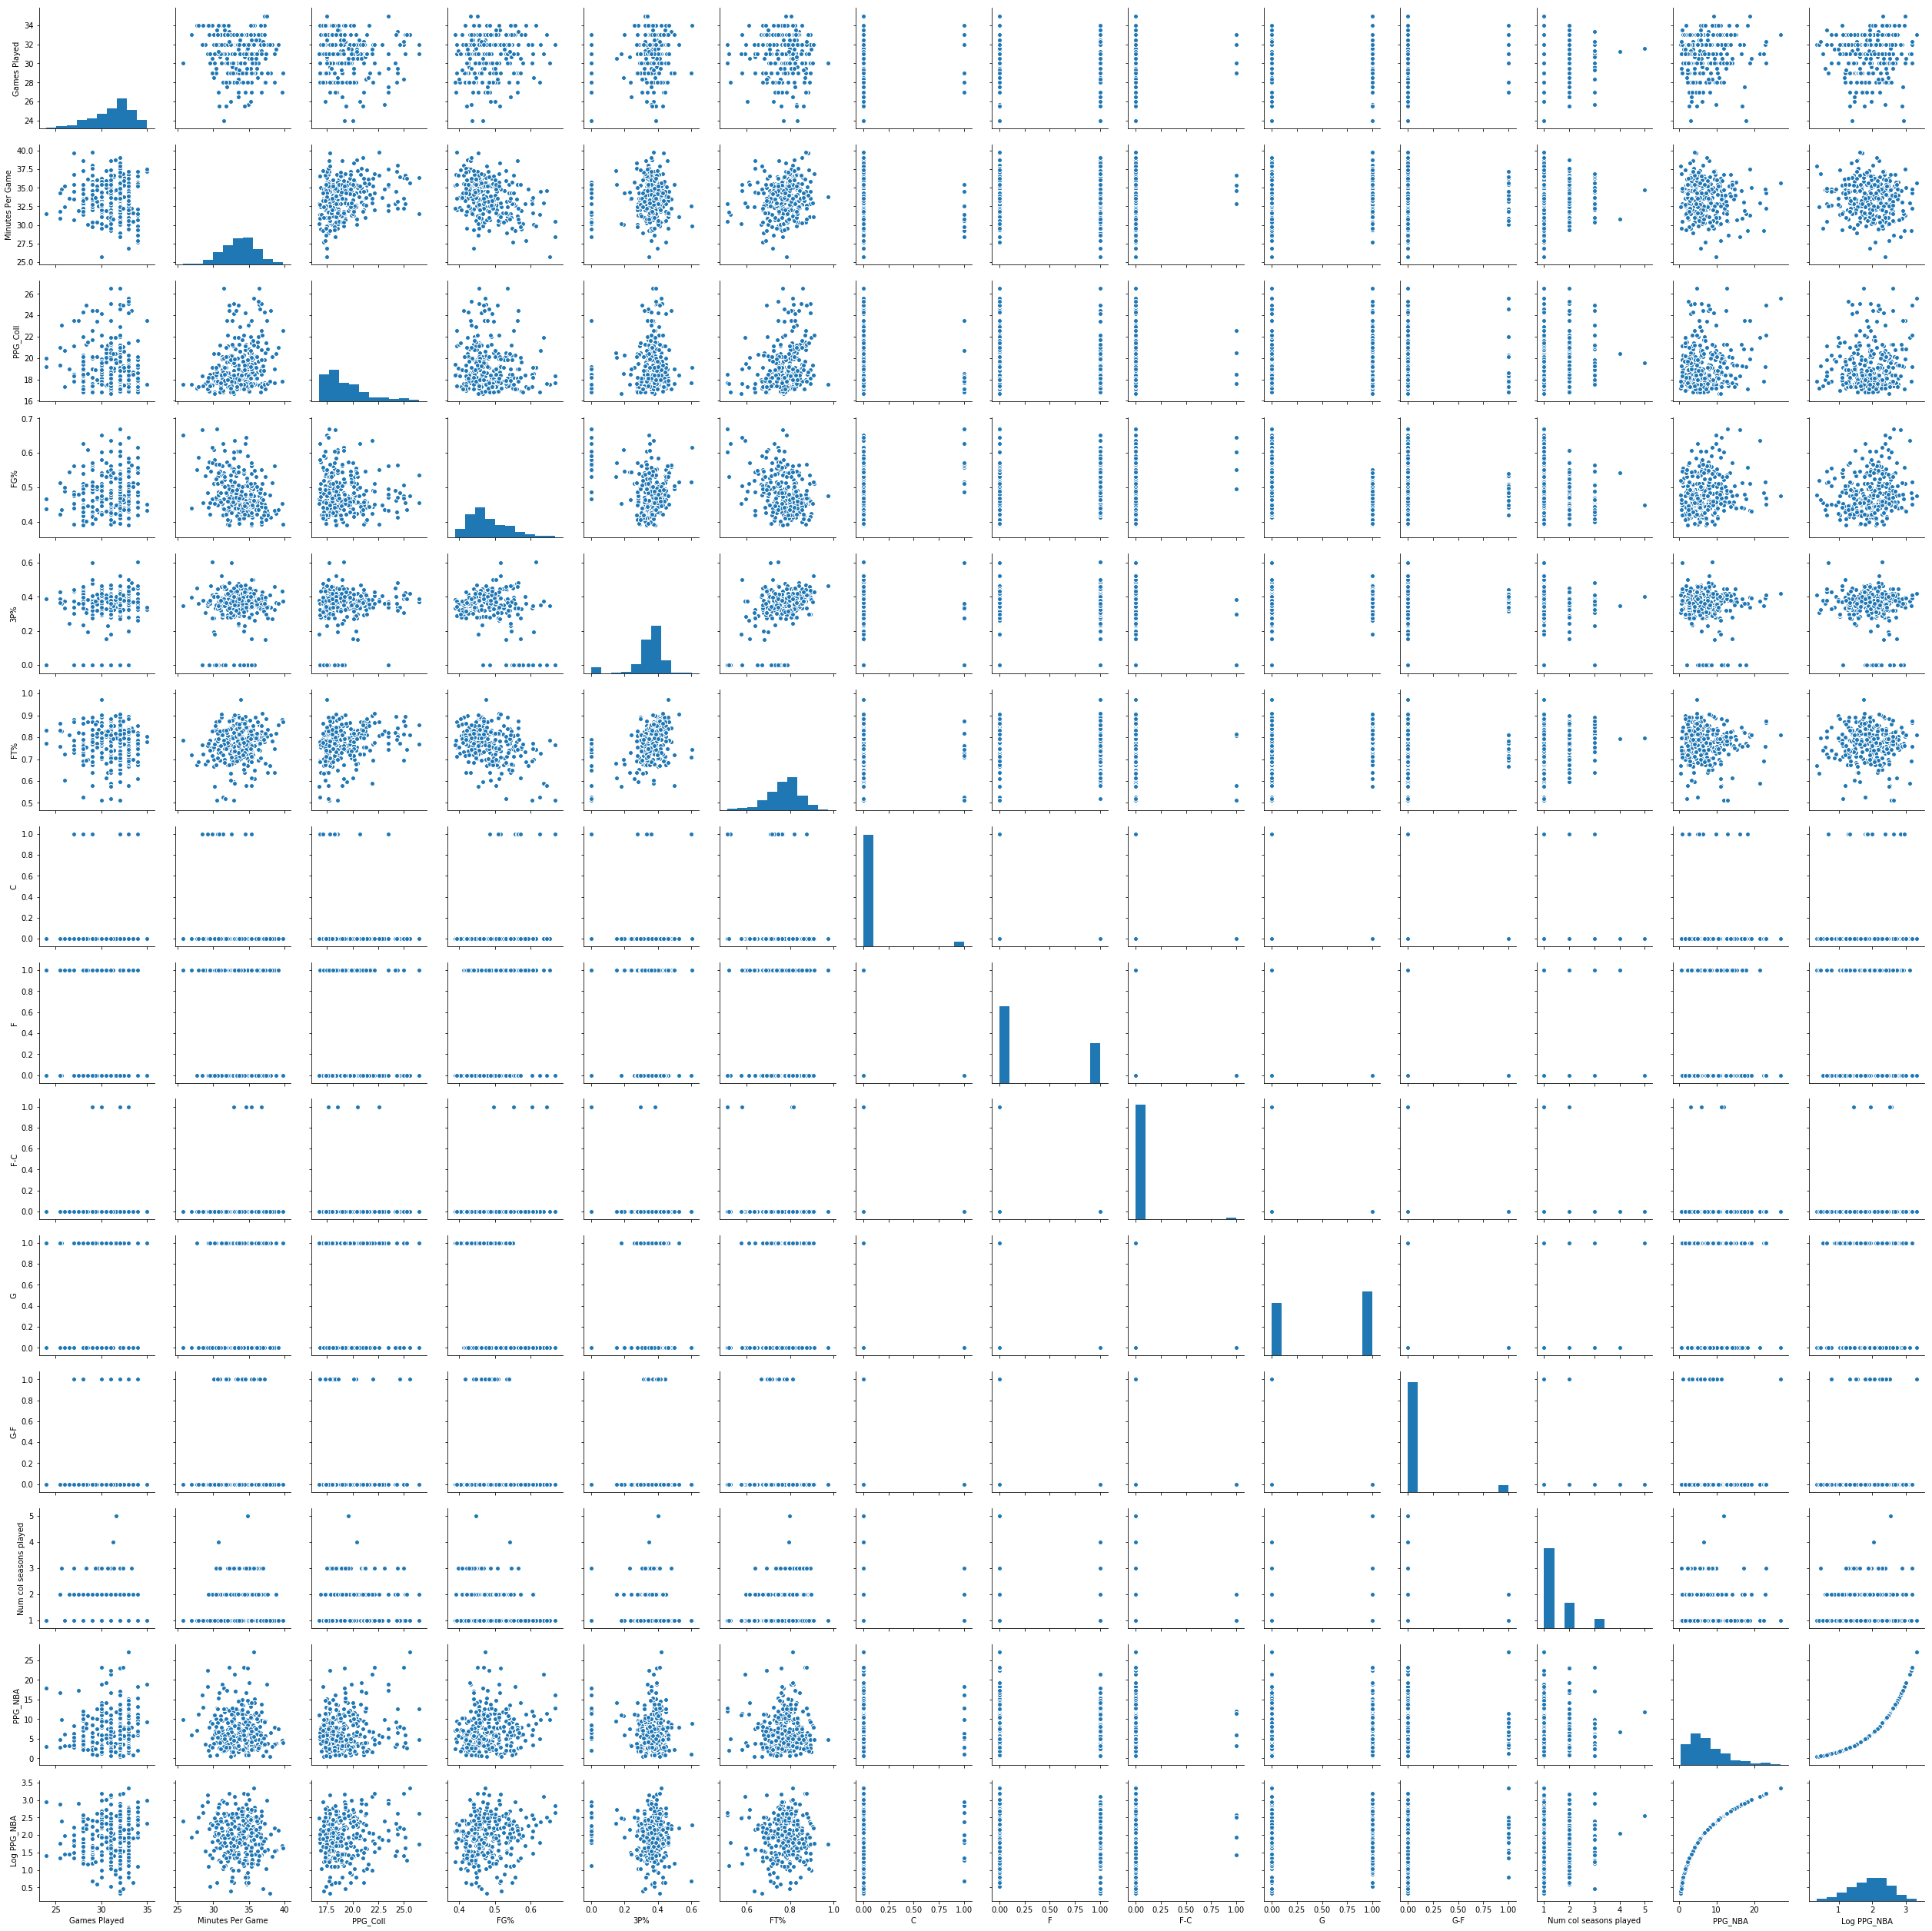

In [573]:
sns.pairplot(final_cleaned_df)

#### Scatter plot of PPG College against PPG NBA to assess the relationship closer. 

Text(0,0.5,'PPG_NBA')

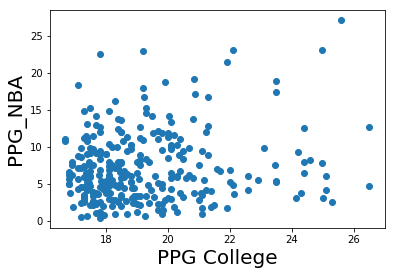

In [640]:
plt.scatter(x=final_cleaned_df['PPG_Coll'], y=final_cleaned_df["PPG_NBA"])
plt.xlabel('PPG College', fontsize=20)
plt.ylabel('PPG_NBA', fontsize=20)

In [680]:
final_cleaned_df['PPG_NBA'].describe()

count    288.000000
mean       7.209722
std        4.703514
min        0.400000
25%        3.700000
50%        6.200000
75%        9.725000
max       27.100000
Name: PPG_NBA, dtype: float64

In [587]:
final_cleaned_df['PPG_NBA'].describe()

count    288.000000
mean       7.209722
std        4.703514
min        0.400000
25%        3.700000
50%        6.200000
75%        9.725000
max       27.100000
Name: PPG_NBA, dtype: float64

In [290]:
#merged_df_minus_names = merged_df_minus_names.drop(merged_df_minus_names[(merged_df_minus_names["PPG_NBA"] > 20)].index)
#merged_df_minus_names = merged_df_minus_names.drop(merged_df_minus_names[(merged_df_minus_names["PPG_NBA"] == 0.00)].index)


In [601]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt 

#### 1.) Data divided first into a train test split to take out a holdout 
#### 2.) The train data from above is further split to make a train/validation test set. 

In [776]:
#['Games Played', 'Minutes Per Game', 'PPG_Coll', 'FG%', '3P%', 'FT%','C', 'F', 'F-C', 'G', 'G-F', 'Num col seasons played', 'PPG_NBA','Log PPG_NBA']
X, y = final_cleaned_df.drop(['PPG_NBA', 'Log PPG_NBA', 'Games Played', '3P%', 'FT%','C', 'F', 'F-C', 'G', 'G-F', 'Num col seasons played'], axis=1), final_cleaned_df['PPG_NBA']
#['Games Played', 'Minutes Per Game', 'PPG_Coll', 'FG%', '3P%', 'FT%', 'C', 'F', 'F-C', 'G', 'G-F']
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3) #hold out 20% for validation




In [777]:
lm = LinearRegression()
p = PolynomialFeatures(degree=2)

In [778]:
scaler = StandardScaler()
lm_reg = Ridge(alpha=1)


# X_orig_scaled = scaler.fit_transform(X)
# X_orig_test = scaler.fit_transform(X_test)
# X_orig_poly_fit = p.fit_transform(X_orig_scaled)
# X_orig_test_poly = p.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_poly = p.fit_transform(X_train)
X_val_poly = p.transform(X_val)
X_test_poly = p.transform(X_test)

lm_poly = LinearRegression()



#### Linear regression & polynomial regressions are used on features w/o any feature engineering to guage the inherent ability to explain the variance in data

In [779]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))


lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))


lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))

Linear Regression val R^2: %.3f -0.09665425897823199
Ridge Regression val R^2: %.3f -0.09542899923209847
Degree 2 polynomial regression val R^2: %.3f -0.12510743937703528


#### A residual plot(predicted - actual) vs (predicted) shows the correct vs incorrect predictions on the VALIDATION set. Note, holdout test not tested on till the end

Text(0,0.5,'Residual')

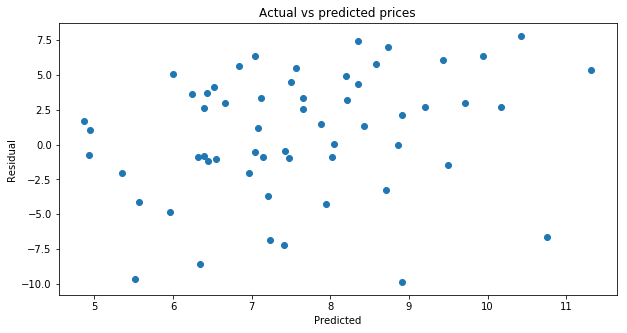

In [780]:
y_pred = lm.predict(X_val)
plt.figure(figsize=(10,5))
plt.scatter(y_pred,y_pred - y_val)
plt.title('Actual vs predicted prices')
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [781]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Data is fit to an OLS model, to guage statistical knowledge about significance levels of the features. 
#### Null hypothesis: The coefficients are 0 as the features do not support the target in any way. With this, it is evident below that Minutes Per game, PPG_Coll & FG% are the only features that are statisticall significant. P value less than significance level of 0.05

In [782]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PPG_NBA   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     200.5
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.59e-63
Time:                        01:53:33   Log-Likelihood:                -678.16
No. Observations:                 230   AIC:                             1362.
Df Residuals:                     227   BIC:                             1373.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Minutes Per Game    -0.2047      0.094     -2.185      0.030      -0.389      -0.020
PPG_Coll             0.5003      0.154      3.258      0.001       0.198       0.803
FG%                  9.7238      4.379      2.220      0.027       1.094      18.353
==============================================================================
Omnibus:                       32.656   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.180
Skew:                           0.924   Prob(JB):                     4.20e-10
Kurtosis:                       4.044   Cond. No.                         556.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Below the Q-Q plot shows if the model is normally distributed or not. It is difficult to say but the data does NOT appear to be very normal

Text(0.5,1,'Normal Q-Q plot')

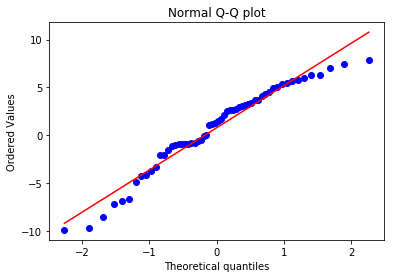

In [762]:
import scipy.stats as stats
%matplotlib inline
stats.probplot(y_pred - y_val, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

In [764]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

Linear Regression val R^2: %.3f -0.09665425897823199
Ridge Regression val R^2: %.3f -0.09542899923209847


In [765]:
lm.coef_

array([-0.22495759,  0.65078755, 11.60239151])

#### According to the above analysis, this problem is difficult to solve using linear regression as the linear regression assumptions fail some tests. So a tree based model is used below to see if the results improve 

In [766]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [767]:
rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train_scaled, y_train)
rf.score(X_val_scaled, y_val)

-0.21964558574135418

In [768]:
rf.score(X_val, y_val)

-4.2491426541744595

#### Conclusion: In a different notebook(Luther scraping part 2) the obvious relationship between minutes played in the NBA and NBA points per game rookie year is shown. Players with higher playing time score more points per game. According to ESPN, minutes rookies play is directly correlated with draft order, which is NOT determined by college performance alone. Draft order is heavily set due to anomalous physical attritubutes of already talented players. So many college players are great, but due to the lack of physical uniqueness, get drafted later in the draft, resulting in lower playing time & lower PPG. 

#### Next steps: Add physical attributes as features in the feature set to see if the predictions improve by indirectly capturing draft order, and projected minutes per game. 

In [299]:
import pickle
with open('merged_df_minus_names.pkl', 'wb') as picklefile:
    pickle.dump(merged_df_minus_names, picklefile)

In [476]:
import pickle
with open('final_cleaned_df.pkl', 'wb') as picklefile:
    pickle.dump(final_cleaned_df, picklefile)